<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Teoría de Filtrado Moderna: Cross-over y pasabanda a partir de prototipo Bessel
#### Dr. Ing. Mariano Llamedo Soria
Grupo de Investigación en Bioingeniería (GIBIO)


En el siguiente documento se presenta una comparativa de las funciones de aproximación estudiadas en Teoría de Filtrado Moderna, en la asignatura Teoría de Circuitos 2:

* Butterworth
* Chebyshev
* Bessel
* Cauer

El script siguiente permite parametrizar el orden de los polinomios de cada función. Como resultado se obtiene:

* Respuesta de módulo, fase y retardo de grupo
* Diagrama de polos y ceros



In [1]:
%matplotlib inline  

import scipy.signal as sig
import matplotlib as mpl
from splane import tfadd, tfcascade, analyze_sys, pzmap, grpDelay, bodePlot, pretty_print_lti, print_subtitle
import numpy as np

mpl.rcParams['figure.figsize'] = (15,15)
    

#### Pasabajo

<IPython.core.display.Math object>

#### Pasa-alto

<IPython.core.display.Math object>

#### Xover

<IPython.core.display.Math object>

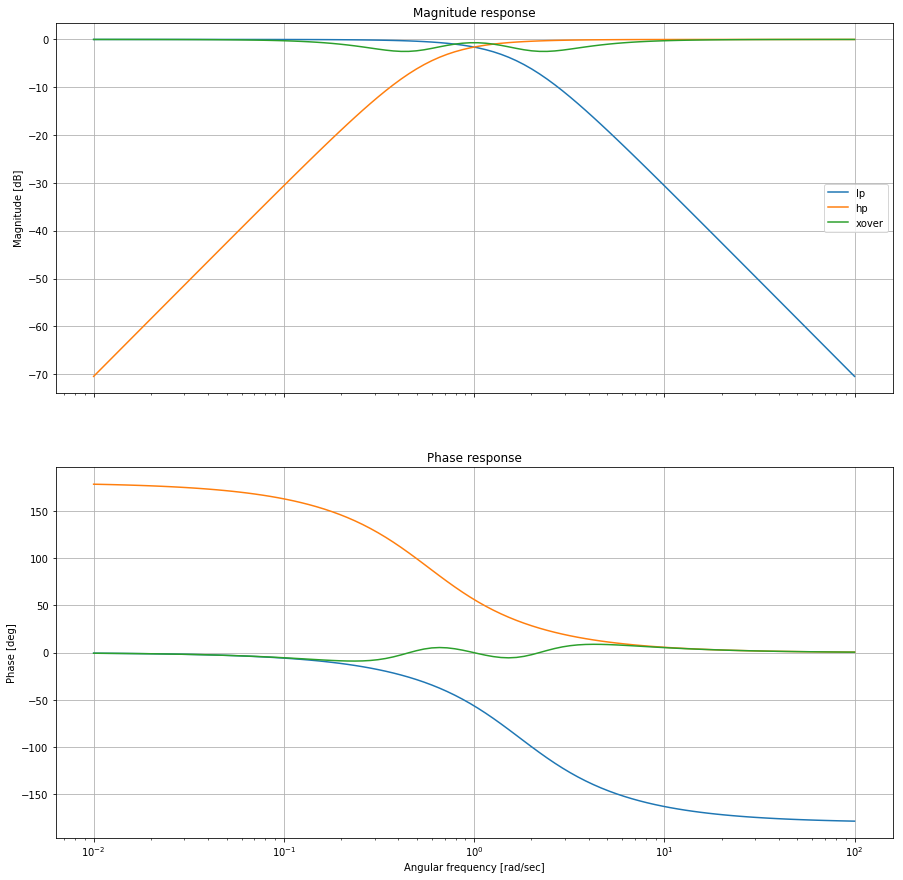

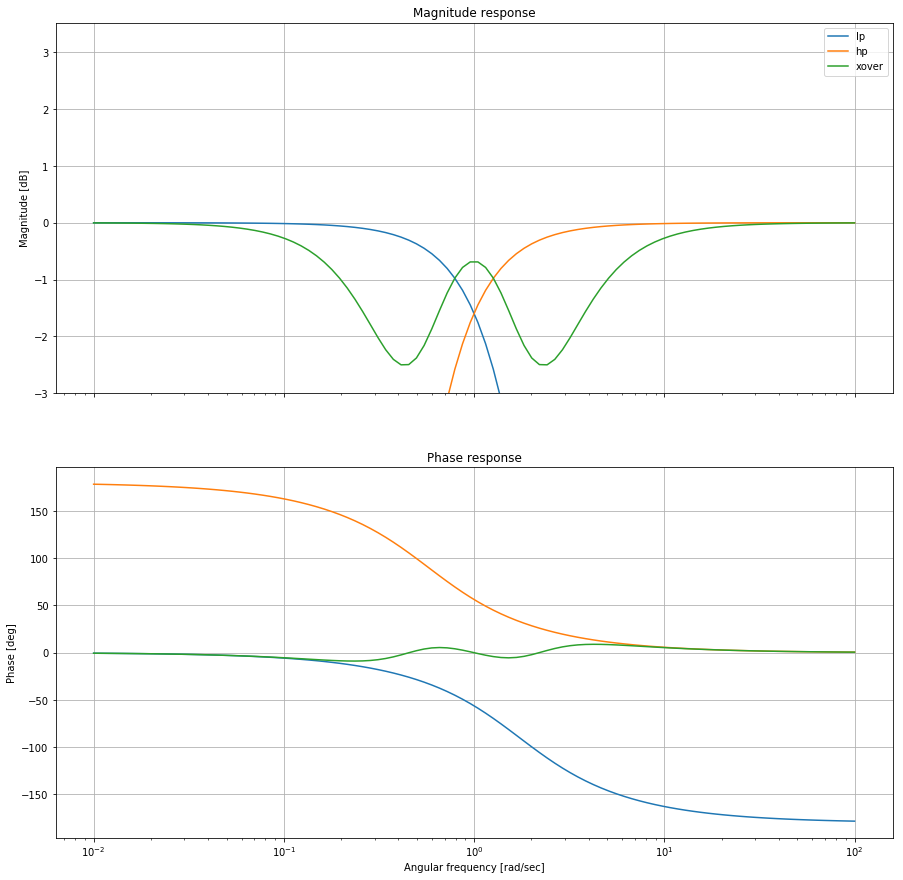

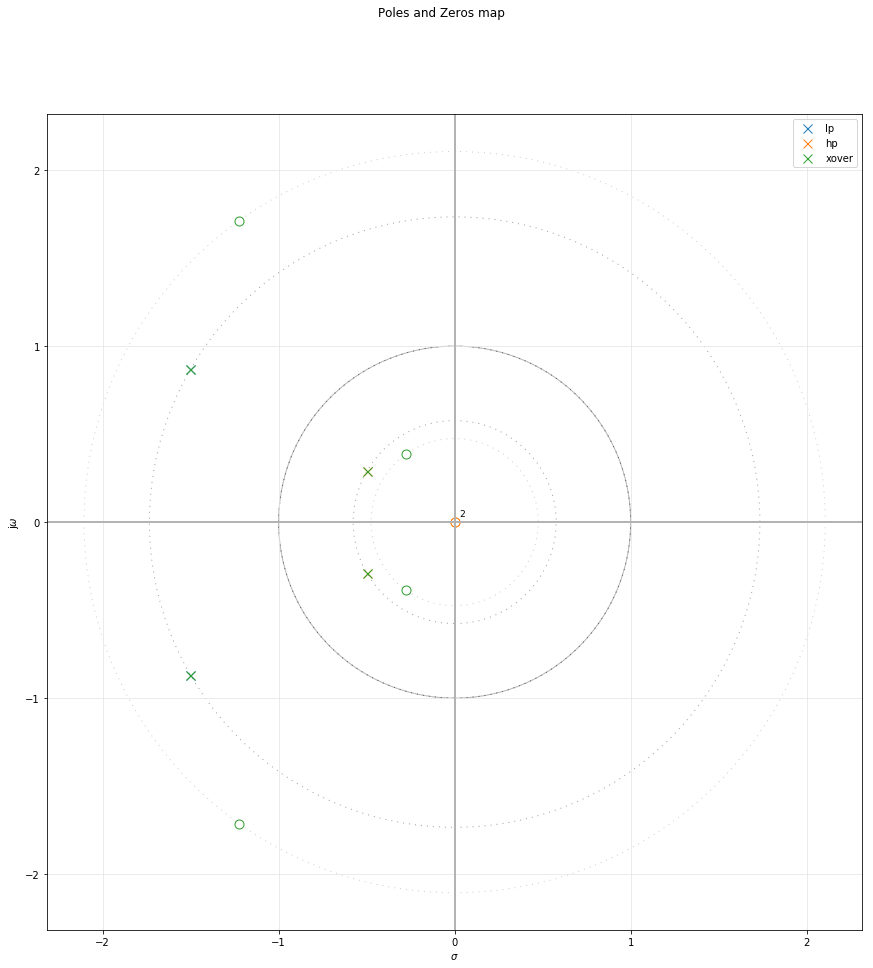

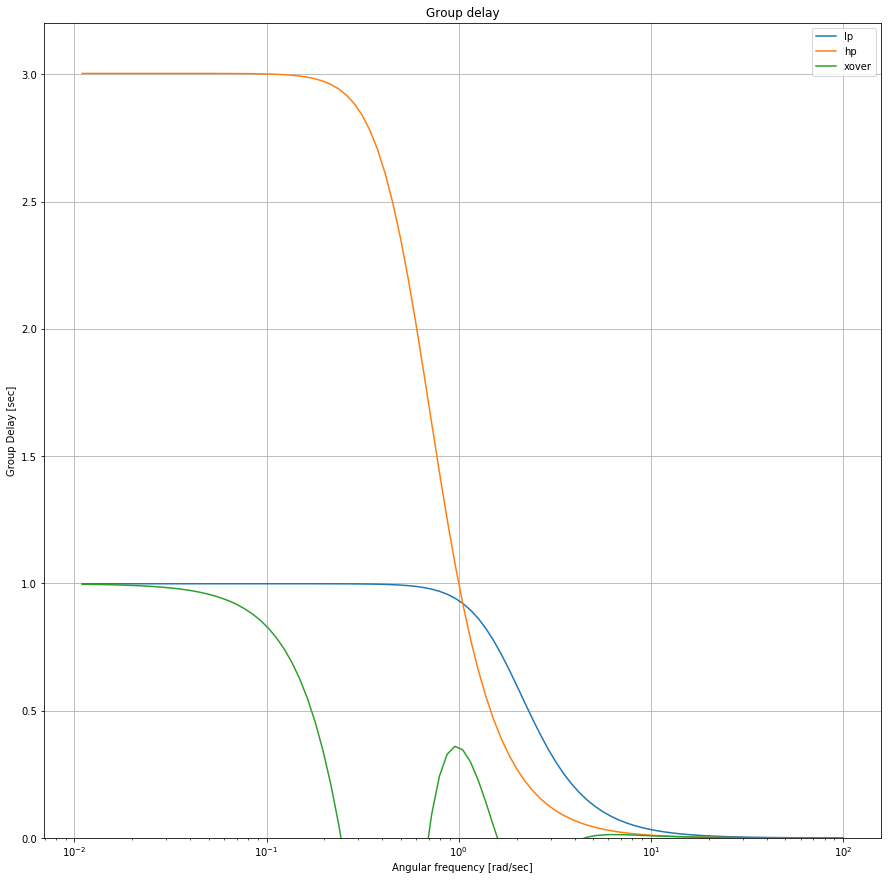

In [10]:
    
#####################
## Start of script ##
#####################
        
nn = 2 # orden
ripple = 3 # dB


eps = np.sqrt(10**(ripple/10)-1)

z,p,k = sig.besselap(nn, norm='mag')
#z,p,k = sig.besselap(nn, norm='phase')
#z,p,k = sig.besselap(nn, norm='delay')
# z,p,k = sig.buttap(nn)


num_lp, den_lp = sig.zpk2tf(z,p,k)
num_lp, den_lp = sig.lp2lp(num_lp, den_lp, eps**(-1/nn) )

num_hp, den_hp = sig.lp2hp(num_lp,den_lp)
lp_sys = sig.TransferFunction(num_lp,den_lp)
hp_sys = sig.TransferFunction(num_hp,den_hp)
xover = tfadd(lp_sys, hp_sys)
bandpass = tfcascade(lp_sys, hp_sys)

print_subtitle('Pasabajo')
pretty_print_lti(lp_sys)

print_subtitle('Pasa-alto')
pretty_print_lti(hp_sys)

print_subtitle('Xover')
pretty_print_lti(xover)


analyze_sys([lp_sys, hp_sys, xover], ['lp', 'hp', 'xover'])


#### Pasabajo

<IPython.core.display.Math object>

#### Pasa-alto

<IPython.core.display.Math object>

#### Pasabanda

<IPython.core.display.Math object>

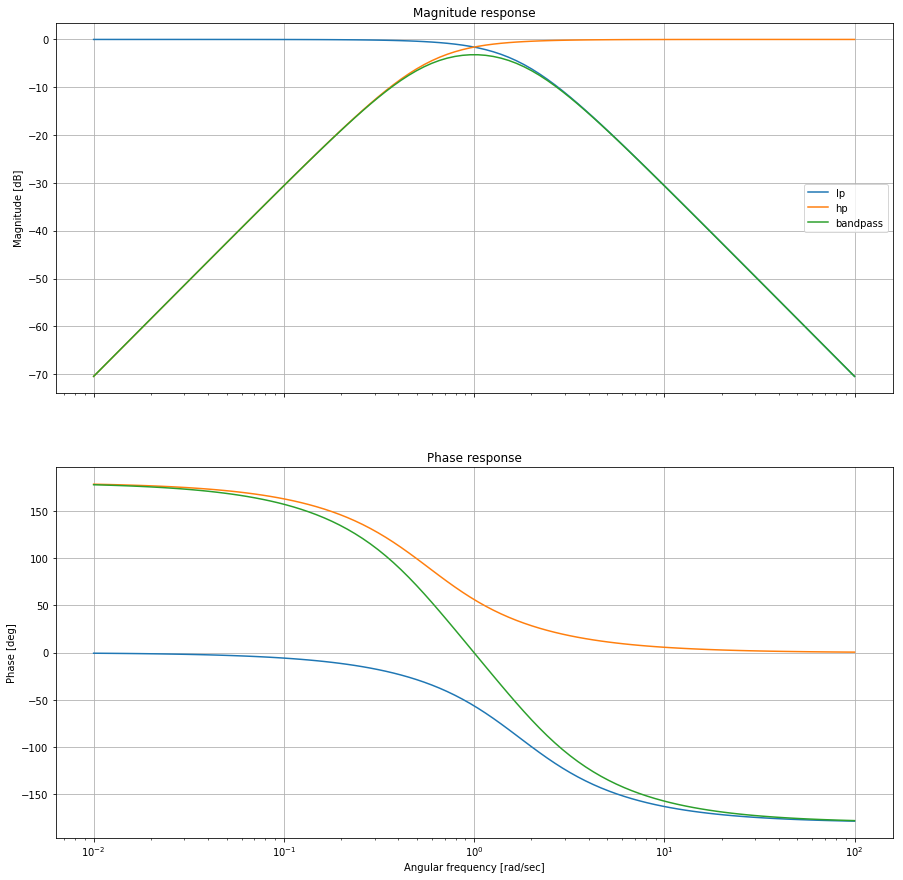

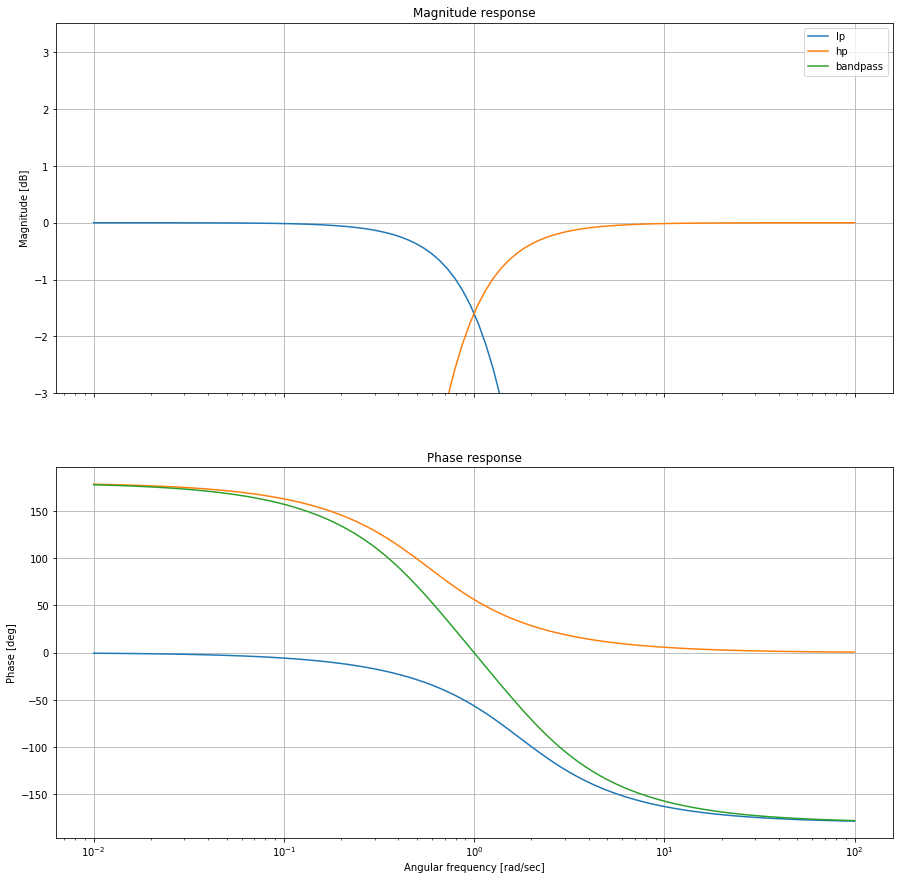

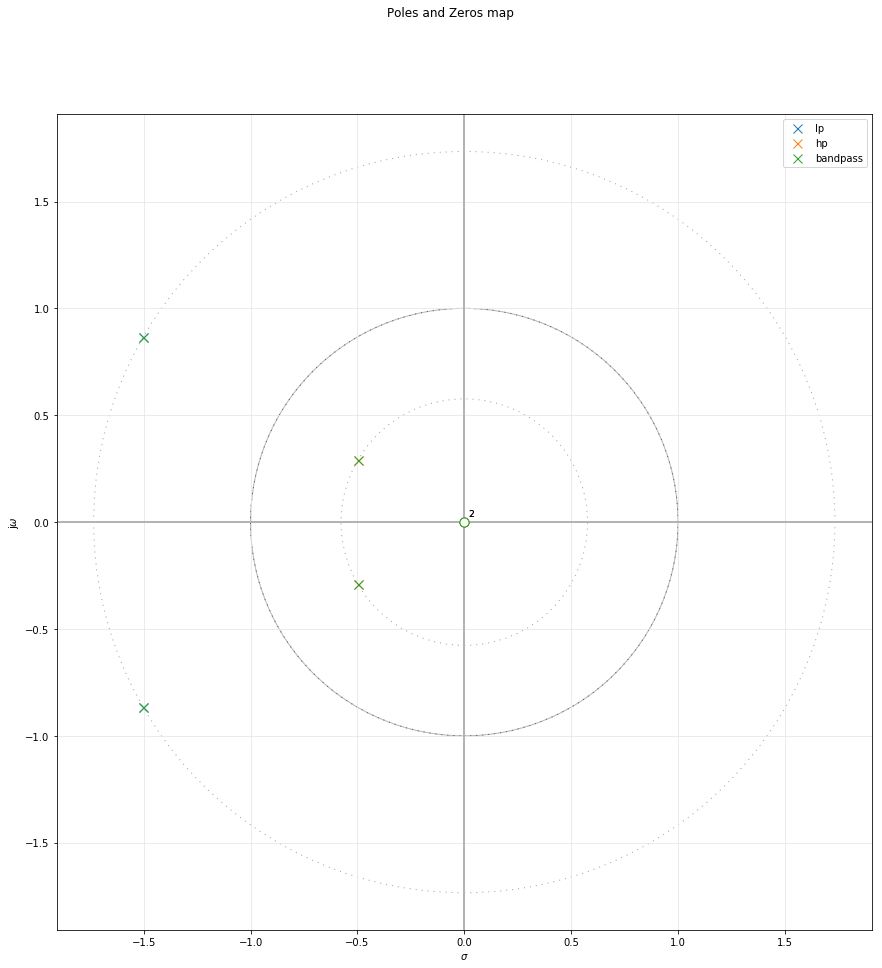

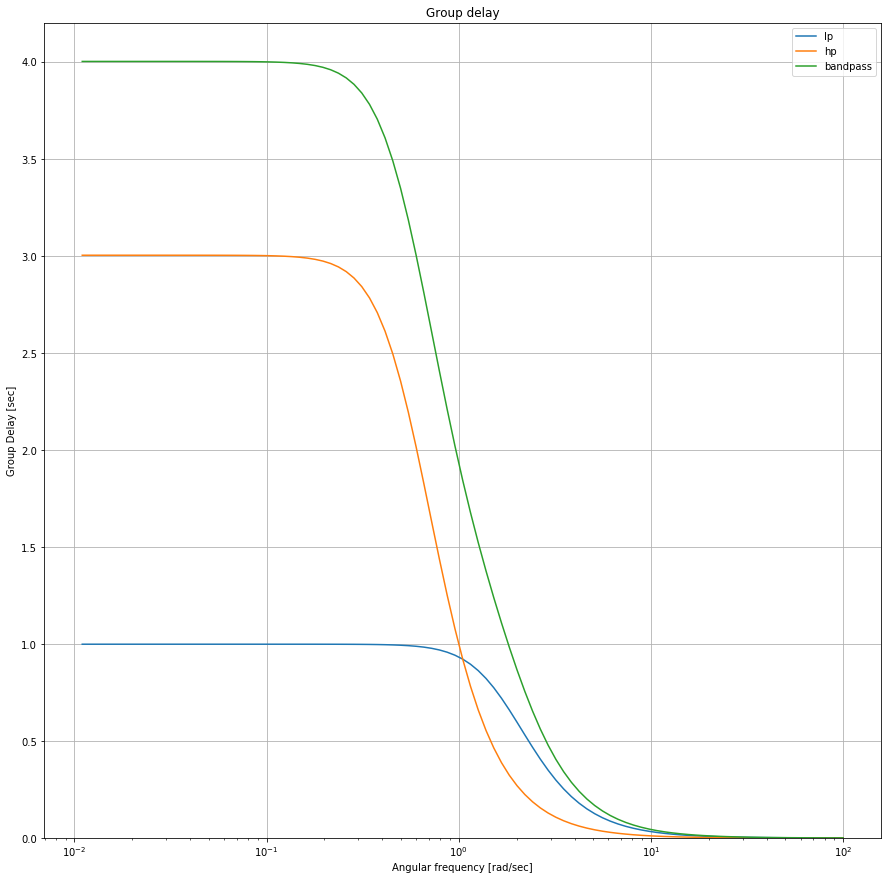

In [6]:
print_subtitle('Pasabajo')
pretty_print_lti(lp_sys)

print_subtitle('Pasa-alto')
pretty_print_lti(hp_sys)

print_subtitle('Pasabanda')
pretty_print_lti(bandpass)

analyze_sys([lp_sys, hp_sys, bandpass], ['lp', 'hp', 'bandpass'])
